In [36]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [38]:
#Encoding the str values
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
3,28,0,2,0,7.798,drugX
92,29,0,0,0,29.450,drugY
195,56,0,1,0,11.567,drugC
17,43,1,0,0,13.972,drugA
50,58,0,0,0,19.416,drugY
62,67,1,1,1,20.693,drugY
120,28,1,2,0,27.064,drugY
7,41,1,1,0,11.037,drugC
56,65,1,0,1,11.340,drugB
146,37,0,1,1,12.006,drugX


In [39]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [40]:
Y = df['Drug']
Y.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [41]:
y = Y.values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [43]:
#Decision_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_predict = tree_model.predict(X_test)

In [45]:
#using sklearn

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        10
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [46]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  1.0


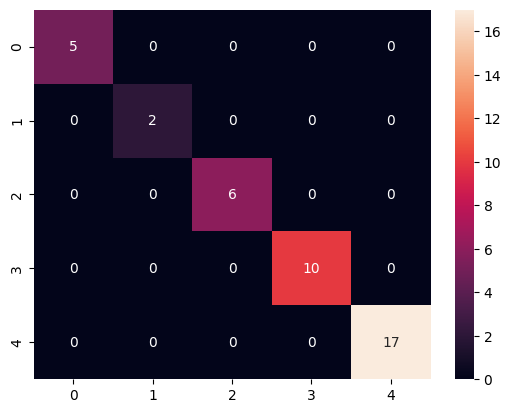

In [47]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [48]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



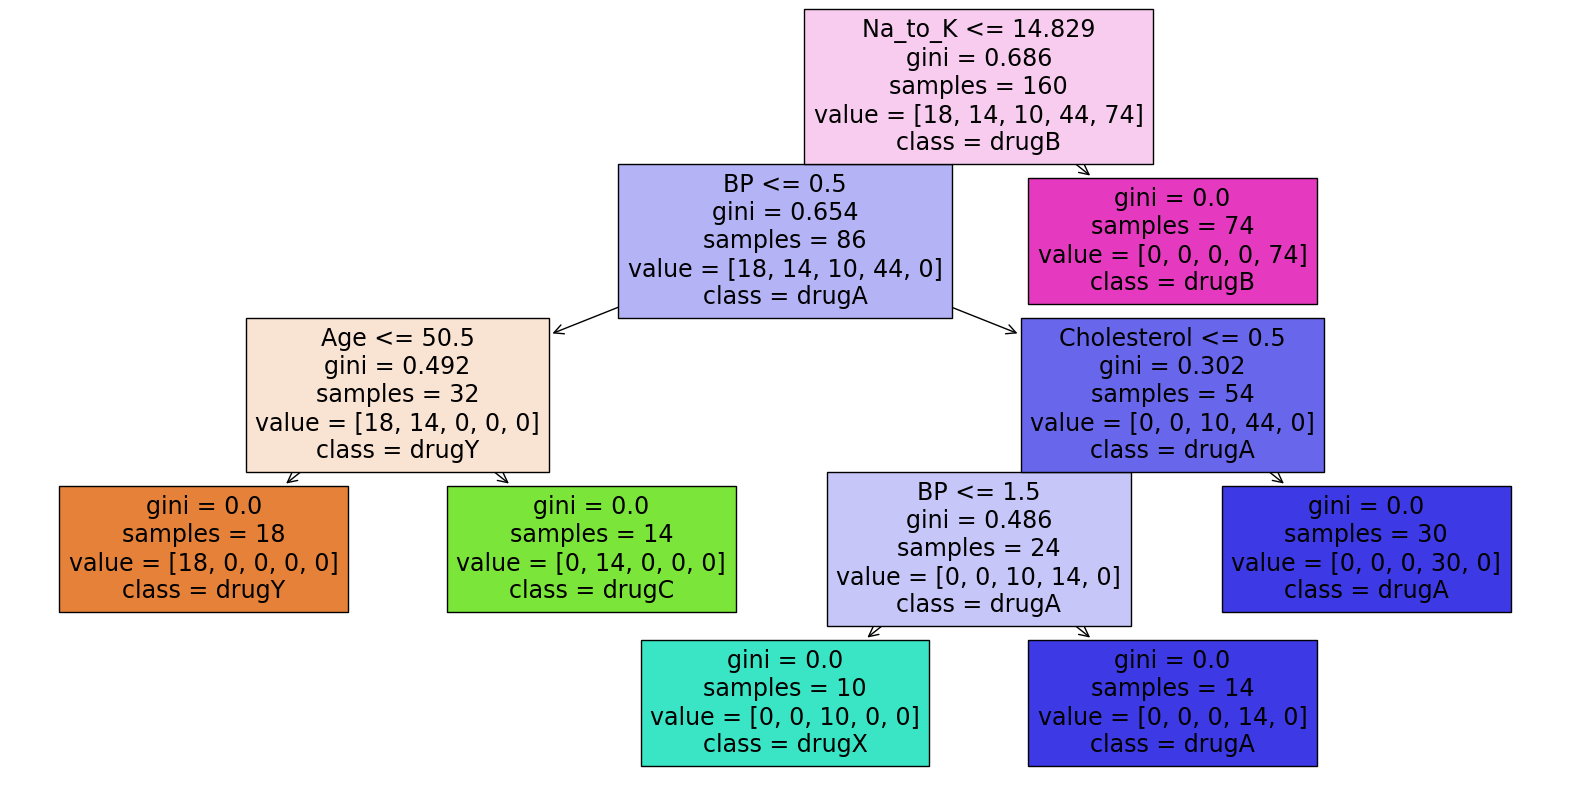

In [49]:
#drawing "Decision Tree"

cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

DecisionTrees's Accuracy:  1.0


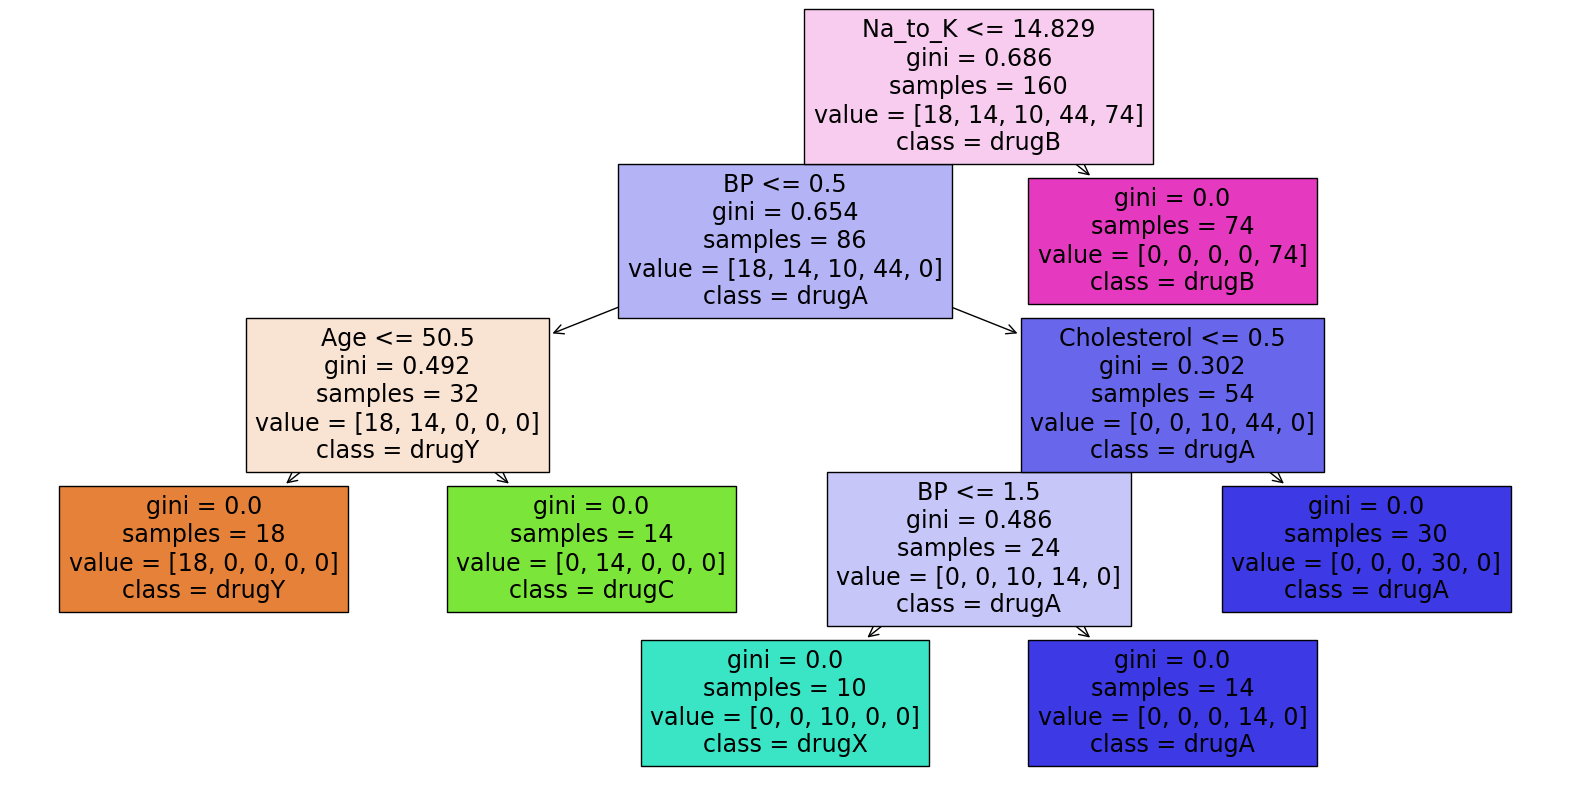

In [50]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

DecisionTrees's Accuracy:  0.85


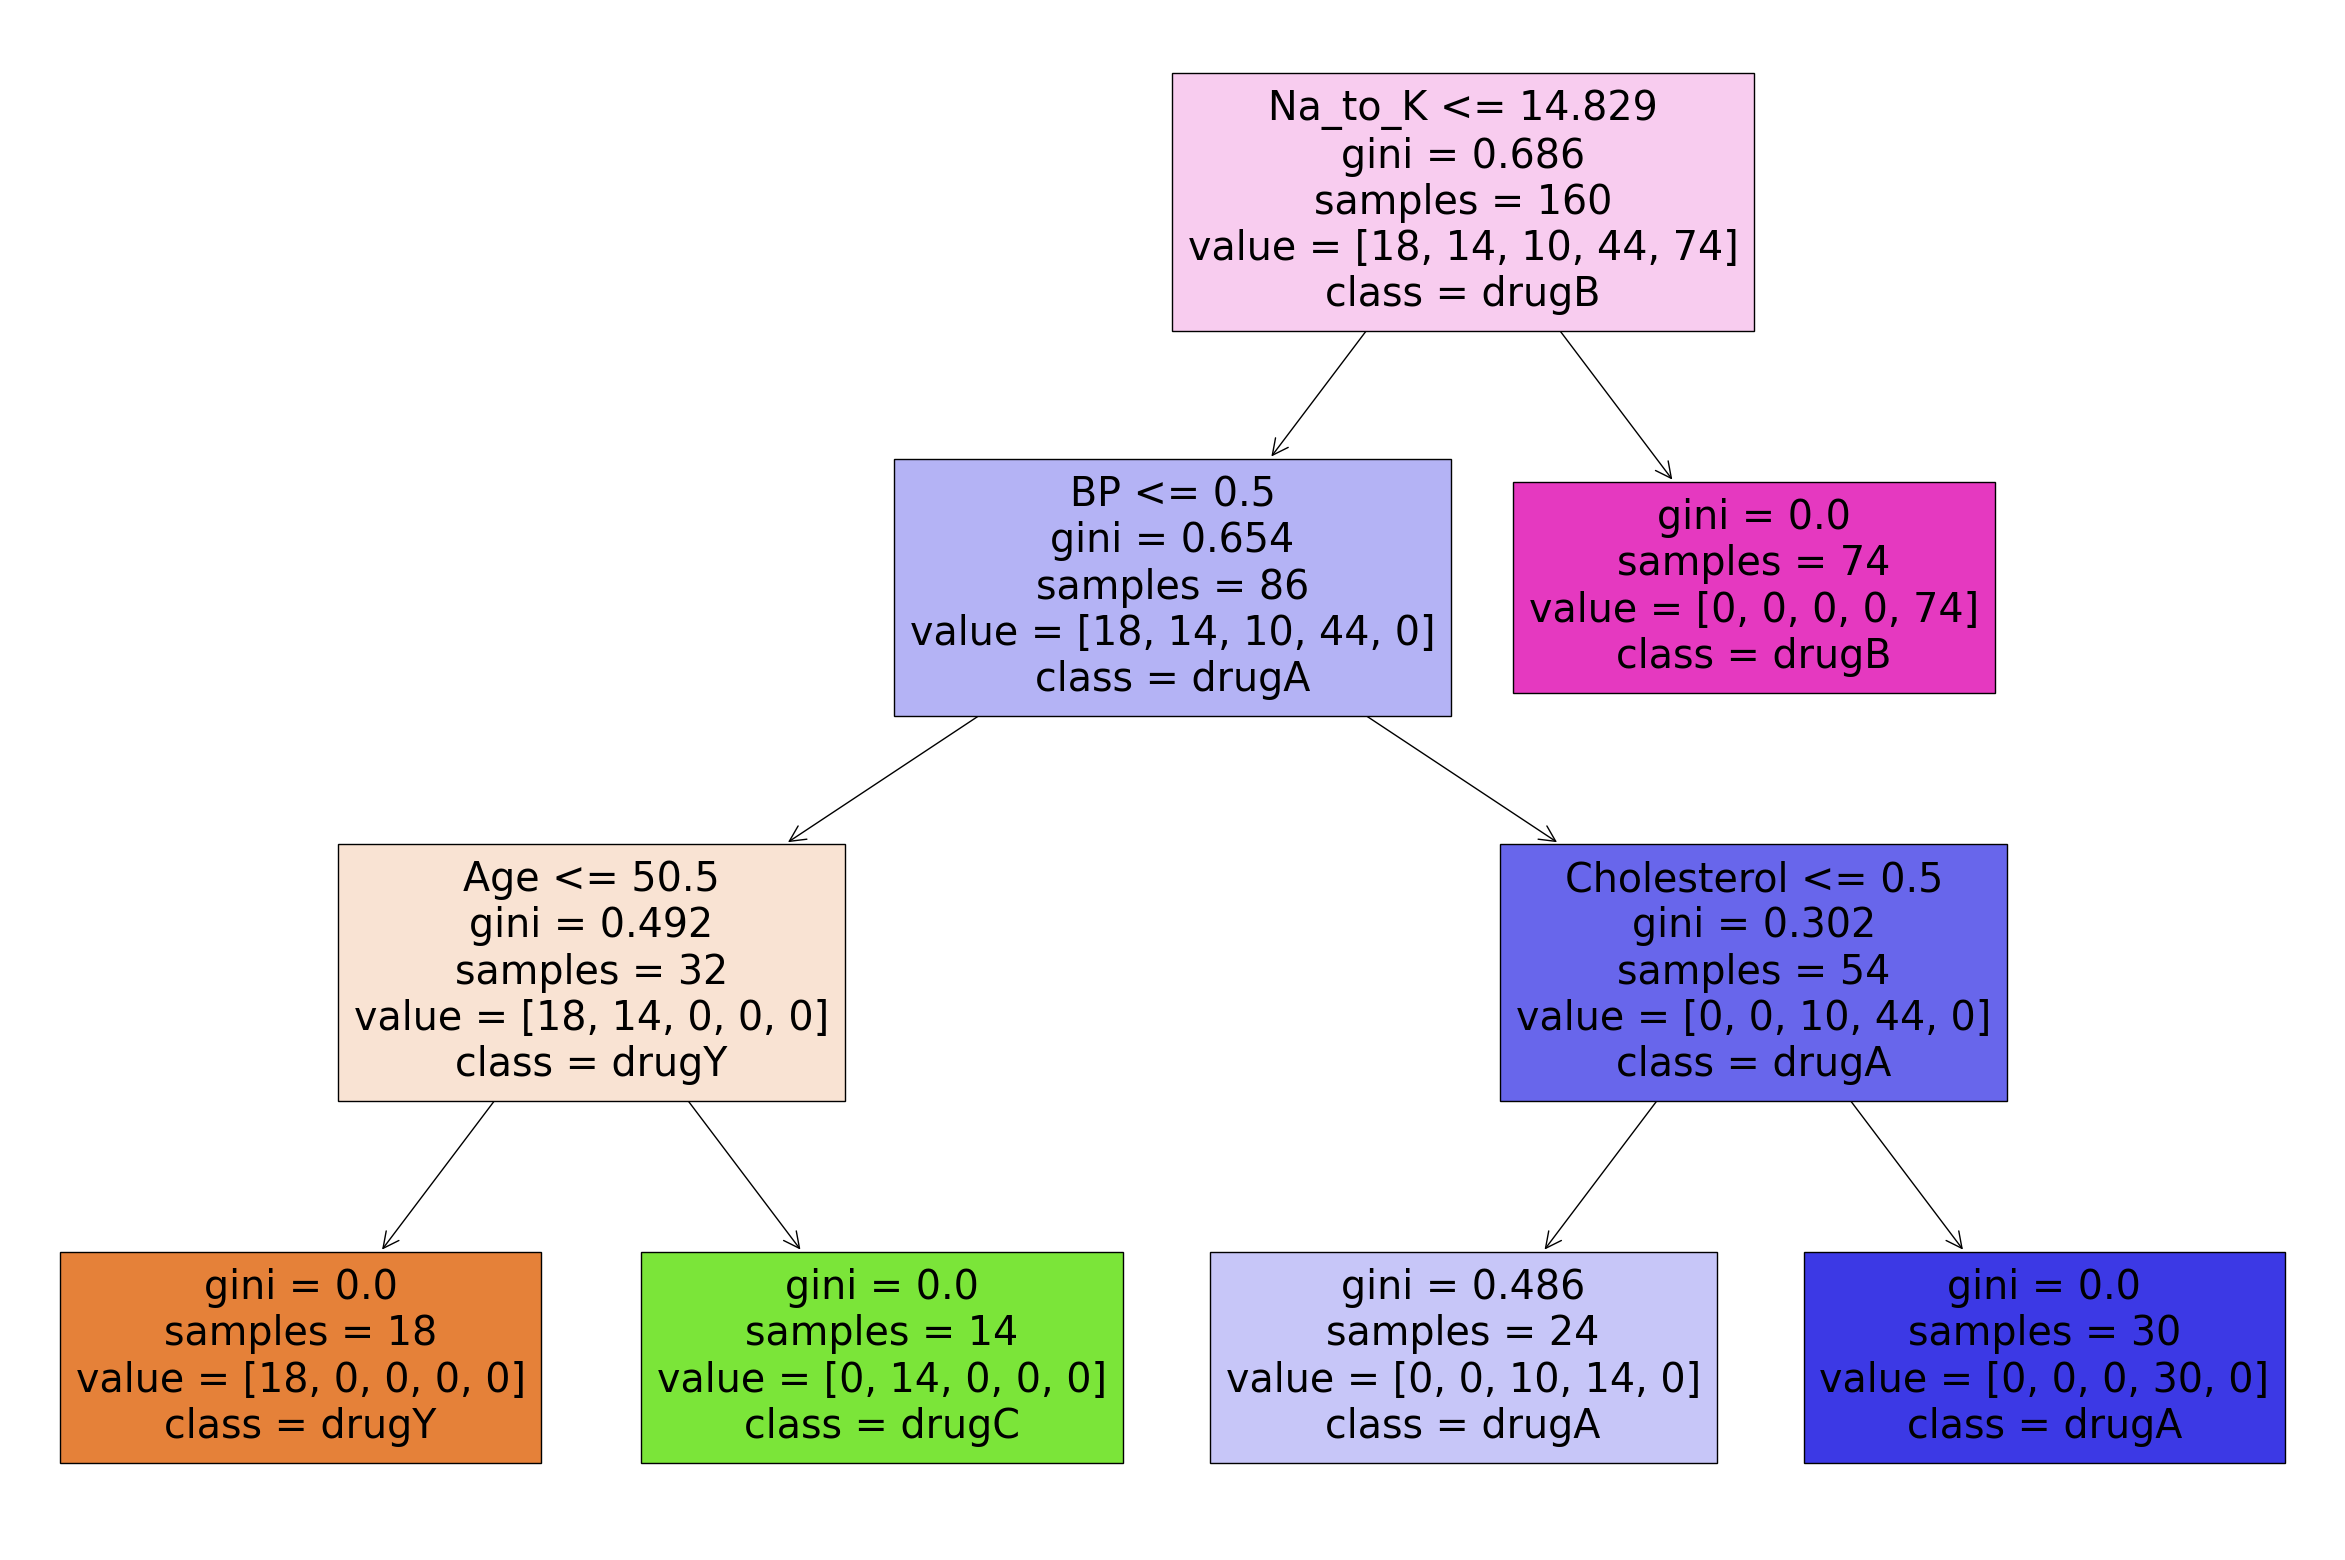

In [51]:
#using 'max-depth', we can change the the number of steps
# using 'min_samples_leaf', minumum number of leaves of the last row

tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0,min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [52]:
#Random Forest

rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        10
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [53]:
print("Random forest's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random forest's Accuracy:  1.0
